# STUDENT PERFORMANCE ANALYSIS
## EXPLORATORY DATA ANALYSIS and REGRESSION

#### TABLE of CONTENTS

1. Import Packages
2. Load Dataset
3. Data Preparation
4. Exploratory Data Analysis
   - Understanding the Data
   - Cleaning the Data
   - Analysis of Relationship between Variables
5. Descriptive Analysis
   - Mean
   - Median
   - STD
   - Variance
   - Minimum
   - Maximum
   - Skewness
   - Kurtosis
     
   MACHINE LEARNING PREPROCESSING
6. Data Preprocessing for Maching Learning
     - Encoding(One Hot Encoding and Label Encoding)
     - Data Formating(Seperating Features and Target Variables)
     - Feature Scaling
     
7.   RANDOM FOREST REGRESSION 
     - Split Data into Traing and Testing Set
     - Fit Model on Training Set
     - Model Prediction
     - Model Evaluation
     
8. Feature Importance of Random Forest Regression

9. Hyperparameter Tuning
    - With GridSearchCV
    - With RandomisedSearchCV
10. Final Model Evaluation and Selection
11. Conclusion

# Import Liberies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import statsmodels.api as sm

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.ensemble import RandomForestRegressor # for building the model
from sklearn import metrics
np.random.seed(42)

import numpy as np

from sklearn.model_selection import RandomizedSearchCV

import Exploratory_Data_Analysis

import pylab as p
from scipy.stats import skew
from scipy.stats import kurtosis


## Load Dataset

In [2]:
# load datasets for two subjects, Math and Portuguese
mat = pd.read_csv("student-mat.csv", sep=';', engine = 'python')
por = pd.read_csv("student-por.csv", sep=';', engine = 'python')

## Data Preparation

In [3]:
#Dataset Merging

student = pd.concat([mat,por], ignore_index = True)
student

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
1041,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
1042,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [4]:
# Rename Columns

student.columns = ["School", "Sex", "Age", "Address", "Family Size", "parent's cohabitation status", "Mother's Education", 
                   "Father's Education", "Mother's Job", "Father's Job", "Reason","Guardian", "Travel Time", "Study Time", 
                   "Failures", "School Support", "Famly Support", "Paid Classes", "Activities", "Nursery", 
                   "Higher Education", "Internet","Romantic", "Family Relationship", "Free Time", "Going Out",
                   "Workday Alcohol Consumption", "Weekend Alcohol Consumption", "Health Status", "Absences","G1", "G2", "G3"]
student.head(1)

,School,Sex,Age,Address,Family Size,parent's cohabitation status,Mother's Education,Father's Education,Mother's Job,Father's Job,...,Family Relationship,Free Time,Going Out,Workday Alcohol Consumption,Weekend Alcohol Consumption,Health Status,Absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6


# EXPLORATORY DATA ANALYSIS


## Understanding the data

In [5]:
student.head()

,School,Sex,Age,Address,Family Size,parent's cohabitation status,Mother's Education,Father's Education,Mother's Job,Father's Job,...,Family Relationship,Free Time,Going Out,Workday Alcohol Consumption,Weekend Alcohol Consumption,Health Status,Absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
student.tail()

,School,Sex,Age,Address,Family Size,parent's cohabitation status,Mother's Education,Father's Education,Mother's Job,Father's Job,...,Family Relationship,Free Time,Going Out,Workday Alcohol Consumption,Weekend Alcohol Consumption,Health Status,Absences,G1,G2,G3
1039,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
1041,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
1042,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10
1043,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,4,10,11,11


In [7]:
student.shape

(1044, 33)

In [8]:
student.columns

Index(['School', 'Sex', 'Age', 'Address', 'Family Size',
       'parent's cohabitation status', 'Mother's Education',
       'Father's Education', 'Mother's Job', 'Father's Job', 'Reason',
       'Guardian', 'Travel Time', 'Study Time', 'Failures', 'School Support',
       'Famly Support', 'Paid Classes', 'Activities', 'Nursery',
       'Higher Education', 'Internet', 'Romantic', 'Family Relationship',
       'Free Time', 'Going Out', 'Workday Alcohol Consumption',
       'Weekend Alcohol Consumption', 'Health Status', 'Absences', 'G1', 'G2',
       'G3'],
      dtype='object')

In [9]:
student.nunique()
#since we have quite a few unique values we can easily convert them to category data type for memory opetimization
# we can also encode them using one hot encording and binary label

School                           2
Sex                              2
Age                              8
Address                          2
Family Size                      2
parent's cohabitation status     2
Mother's Education               5
Father's Education               5
Mother's Job                     5
Father's Job                     5
Reason                           4
Guardian                         3
Travel Time                      4
Study Time                       4
Failures                         4
School Support                   2
Famly Support                    2
Paid Classes                     2
Activities                       2
Nursery                          2
Higher Education                 2
Internet                         2
Romantic                         2
Family Relationship              5
Free Time                        5
Going Out                        5
Workday Alcohol Consumption      5
Weekend Alcohol Consumption      5
Health Status       

## Cleaning the Data

In [10]:
#Checking for duplicates

student.duplicated().sum()
student.duplicated().unique()

array([False])

In [11]:
# checking for missing/ null values

student.isnull().sum()

School                          0
Sex                             0
Age                             0
Address                         0
Family Size                     0
parent's cohabitation status    0
Mother's Education              0
Father's Education              0
Mother's Job                    0
Father's Job                    0
Reason                          0
Guardian                        0
Travel Time                     0
Study Time                      0
Failures                        0
School Support                  0
Famly Support                   0
Paid Classes                    0
Activities                      0
Nursery                         0
Higher Education                0
Internet                        0
Romantic                        0
Family Relationship             0
Free Time                       0
Going Out                       0
Workday Alcohol Consumption     0
Weekend Alcohol Consumption     0
Health Status                   0
Absences      

## Analysis of Relationship between variables

In [12]:
corr_matrix = student.corr()
#Now let’s look at how much each attribute correlates with the FINAL grade:
corr_matrix["G3"].sort_values(ascending=False)

G3                             1.000000
G2                             0.910743
G1                             0.809142
Mother's Education             0.201472
Study Time                     0.161629
Father's Education             0.159796
Family Relationship            0.054461
Absences                      -0.045671
Free Time                     -0.064890
Health Status                 -0.080079
Going Out                     -0.097877
Travel Time                   -0.102627
Weekend Alcohol Consumption   -0.115740
Age                           -0.125282
Workday Alcohol Consumption   -0.129642
Failures                      -0.383145
Name: G3, dtype: float64

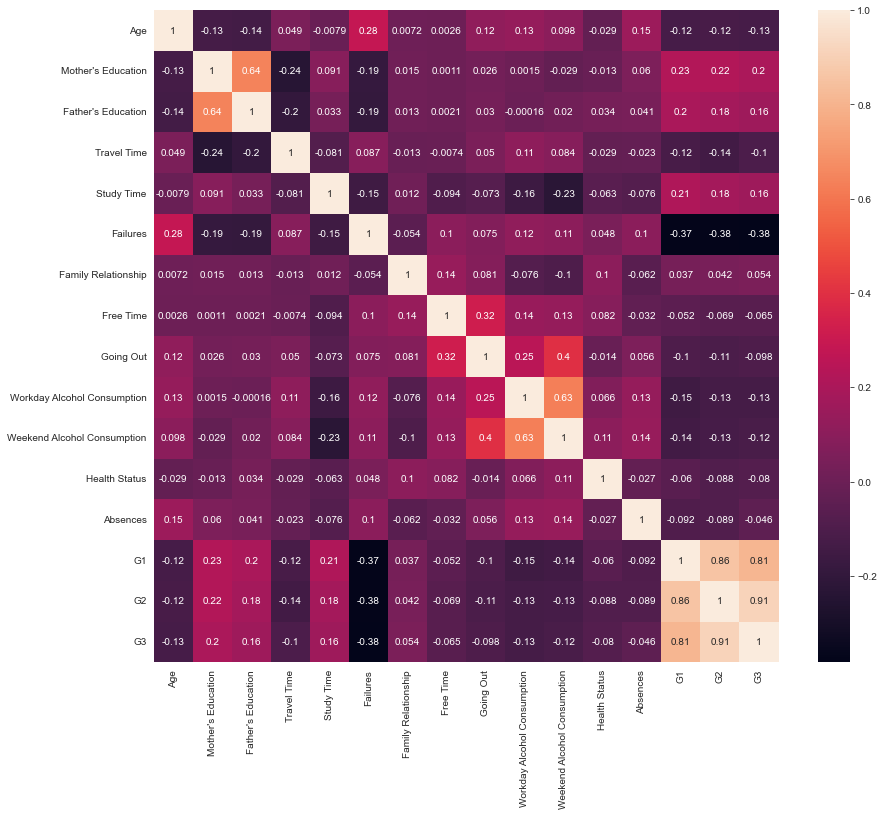

In [13]:
#Correlation coefficient Matrix

plt.figure(figsize=(14, 12))
sns.heatmap(student.corr(), annot=True,)
plt.show()

From all the methods and all the codes that I applied to the data;

Mother’s education, Father’s education, study time affect grades positively when they are high.
Travel time, failures, going out time, free time, absences, alcohol intake affect grades negatively when they are high.
Other attributes have minor affects.

it seems g1, g2 will be strong predictor of g3, but hopefully some of the other features will help predict

it looks like not many of the features are correlated except g1,g2,g3 so g1 predit both g2 and g3,g2 predict g1 and g3 and g3 predict g1 and g2, they are highly correlated bcos they are the cousre grade meaning people that are doing well in cos, early in the course are most likely doing well late in the course and vise versa

other correlation includes the mother education which is correlated with the fater education level which makes sense the weekend alchol comsumption have a positive correlations with wheter or not they are going out and also positive correlation with the daytime alcohol comsumption.

failures is negatively correlated with G1,G2 and g3

study time and weekend alcohol comsumption are also negatively correlated bcos students that are engaing in weekend alcohol consumption are loosing out on study time

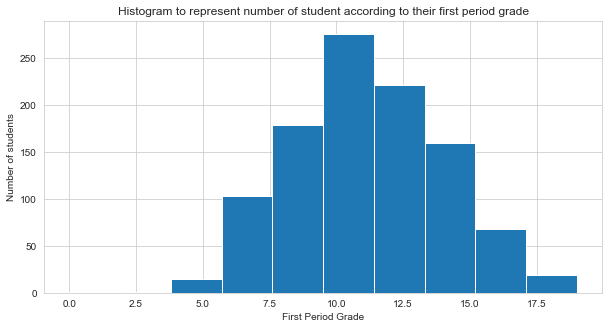

In [14]:
#plot frequency distribution

student["G1"].hist(bins=10, figsize=(10,5))
#plt.hist(student["G1"])
plt.xlabel("First Period Grade")
plt.ylabel("Number of students")
plt.title("Histogram to represent number of student according to their first period grade")
plt.rcParams.update({'font.size': 10})
plt.show()

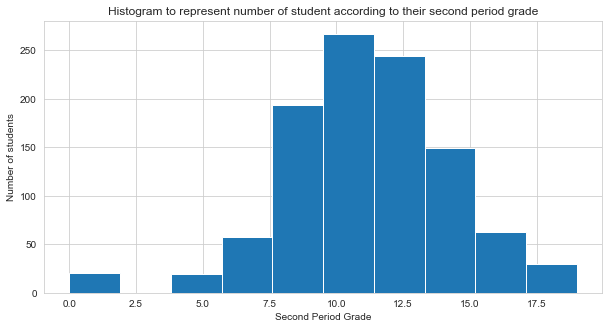

In [15]:
student["G2"].hist(bins=10, figsize=(10,5))
plt.xlabel("Second Period Grade")
plt.ylabel("Number of students")
plt.title("Histogram to represent number of student according to their second period grade")
plt.rcParams.update({'font.size': 10})
plt.show()

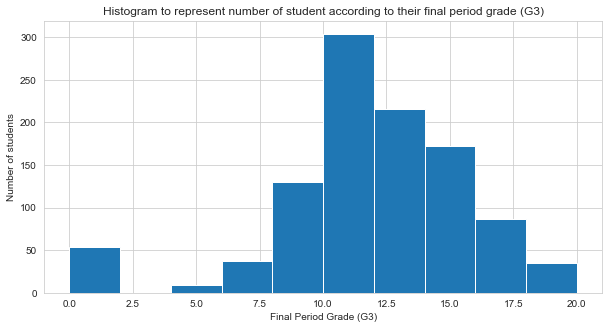

In [16]:
student["G3"].hist(bins=10, figsize=(10,5))
plt.xlabel("Final Period Grade (G3)")
plt.ylabel("Number of students")
plt.title("Histogram to represent number of student according to their final period grade (G3)")
plt.rcParams.update({'font.size': 10})
plt.show()

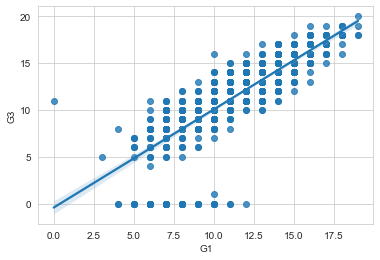

In [17]:
sns.regplot(x="G1", y="G3", data=student)

output = None

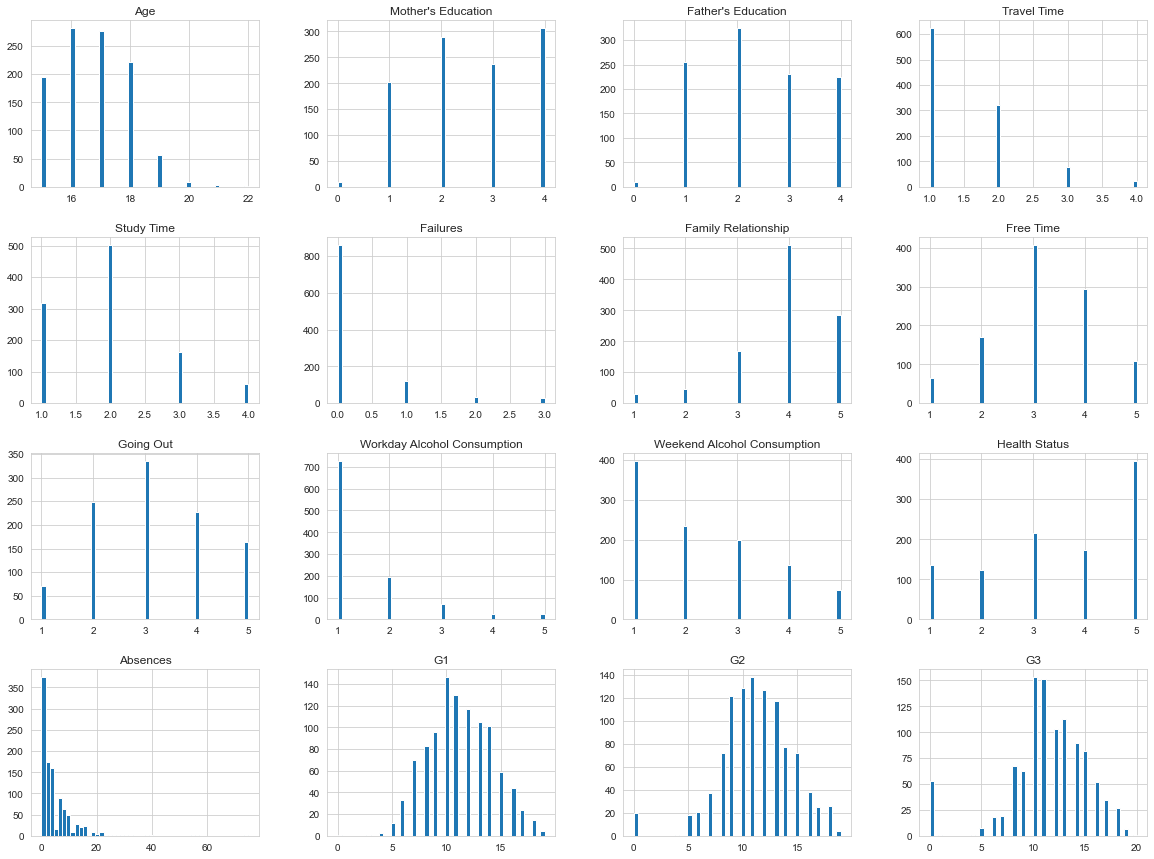

In [18]:
student.hist(bins=50, figsize=(20,15))
plt.show()

output = None

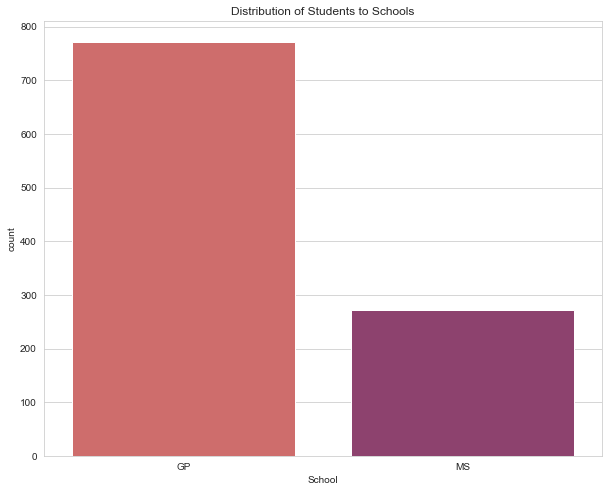

In [19]:
#Checking The School Column
#plt.figure(figsize=(8,8))
plt.figure(figsize=(10,8))
sns.countplot(x='School', data=student, palette='flare',)
plt.xlabel("Schools")
plt.ylabel("Number of students")
plt.title("Distribution of Students to Schools")
sns.countplot(x='School', data=student, palette='flare',)
plt.show()

#this dataset was collected from two schools, GP as Gabriel Pereira and MS as Mousinho da Silveira. Gabriel Pereira’s students 
#are greater than Mousinho da Silveira’s students in this dataset.

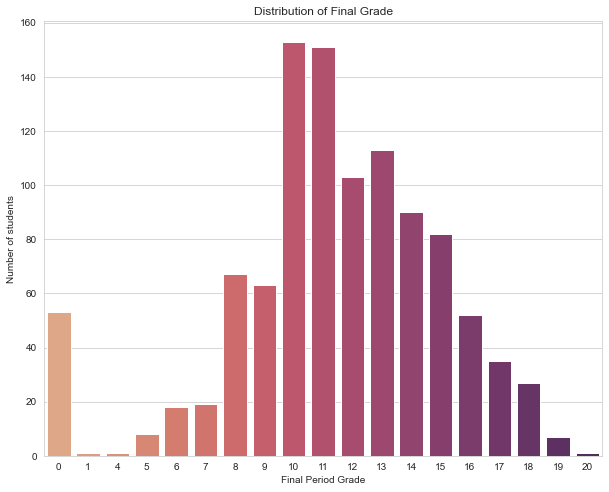

In [20]:
plt.figure(figsize=(10,8))
sns.countplot(x='G3', data=student, palette='flare',)
plt.xlabel("Final Period Grade")
plt.ylabel("Number of students")
plt.title("Distribution of Final Grade")
plt.rcParams.update({'font.size': 10})
plt.show()



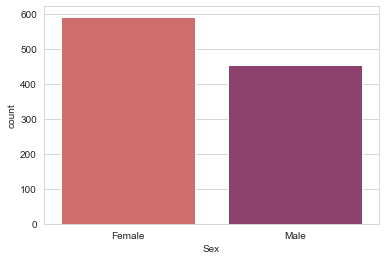

In [21]:
#Checking The Sex Column
gender = {'F':'Female',
            'M':'Male'}
student['Sex'] = student['Sex'].map(gender)
sns.countplot(x=student['Sex'], palette='flare')
plt.show()

#female students are greater than male students.

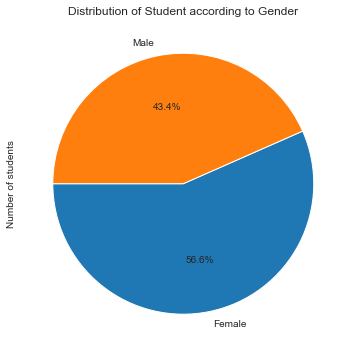

In [22]:
gender_counts = student['Sex'].value_counts()
plt.figure(figsize=(10,6))
plt.ylabel("Number of students")
plt.title('Distribution of Student according to Gender')
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180);



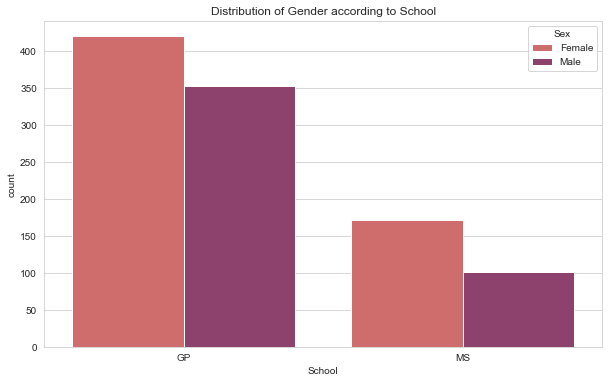

In [23]:

plt.figure(figsize=(10,6))
plt.ylabel("Number of students")
plt.title('Distribution of Gender according to School')
sns.countplot(x='School', hue='Sex', data=student, palette='flare')
plt.show()

# female students in Gabriel Pereira outnumber male students. Similarly, at Mousinho da Silveira, female students are greater than male students.

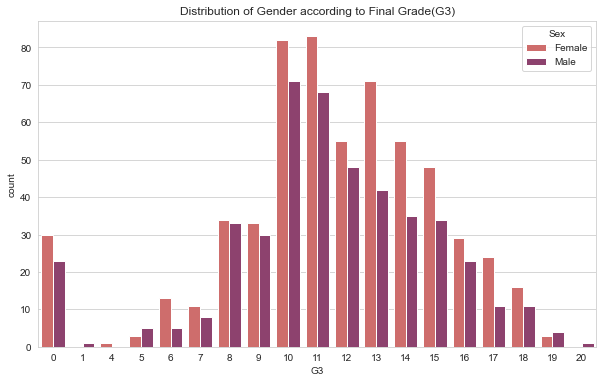

In [24]:
plt.figure(figsize=(10,6))
plt.ylabel("Number of students")
plt.title('Distribution of Gender according to Final Grade(G3)')
sns.countplot(x='G3', hue='Sex', data=student, palette='flare')
plt.show()


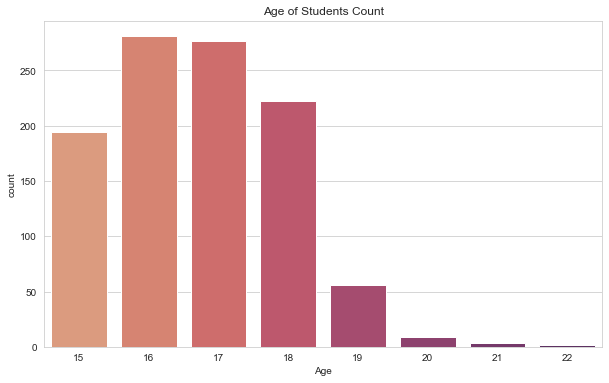

In [25]:
#Checking The Age Column
plt.figure(figsize=(10,6))
plt.ylabel("Number of students")
plt.title('Age of Students Count')
sns.countplot(x=student['Age'], palette='flare')
plt.show()

<Figure size 720x432 with 0 Axes>

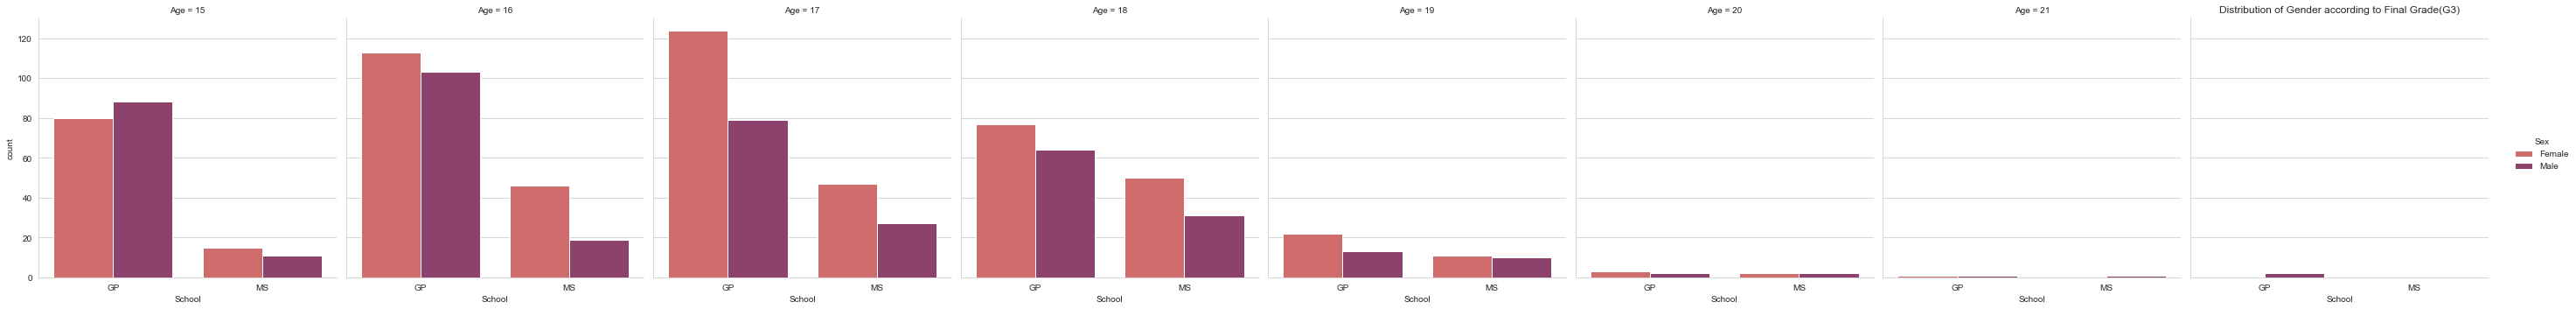

In [26]:
plt.figure(figsize=(10,6))
sns.catplot(x='School', hue='Sex', col='Age', data=student, kind='count', palette='flare')
plt.ylabel("Number of students")
plt.title('Distribution of Gender according to Final Grade(G3)')
plt.show()

# Descriptive Analysis

### MEAN

In [27]:
# mean 
print("The mean of G1 is | {}".format(Exploratory_Data_Analysis.mean_score(student['G1'])))
print("The mean of G2 is | {}".format(Exploratory_Data_Analysis.mean_score(student['G2'])))
print("The mean of G3 is | {}".format(Exploratory_Data_Analysis.mean_score(student['G3'])))
print("The mean of AGE is | {}".format(Exploratory_Data_Analysis.mean_score(student['Age'])))
print("The mean of Study Time is | {}".format(Exploratory_Data_Analysis.mean_score(student['Study Time'])))

The mean of G1 is | 11.21360153256705
The mean of G2 is | 11.246168582375478
The mean of G3 is | 11.341954022988507
The mean of AGE is | 16.726053639846743
The mean of Study Time is | 1.9703065134099618


### MEDIAN

In [28]:
print("The median of G1 is | {}".format(Exploratory_Data_Analysis.median_scores(student['G1'])))
print("The median of G2 is | {}".format(Exploratory_Data_Analysis.median_scores(student['G2'])))
print("The median of G3 is | {}".format(Exploratory_Data_Analysis.median_scores(student['G3'])))
print("The median of AGE is | {}".format(Exploratory_Data_Analysis.median_scores(student['Age'])))
print("The median of Study Time is | {}".format(Exploratory_Data_Analysis.median_scores(student['Study Time'])))

The median of G1 is | 11.0
The median of G2 is | 11.0
The median of G3 is | 11.0
The median of AGE is | 17.0
The median of Study Time is | 2.0


### STANDARD DEVIATION

In [29]:
print("The standard deviation of G1 is | {}".format(Exploratory_Data_Analysis.std_score(student['G1'])))
print("The standard deviation of G2 is | {}".format(Exploratory_Data_Analysis.std_score(student['G2'])))
print("The standard deviation of G3 is | {}".format(Exploratory_Data_Analysis.std_score(student['G3'])))
print("The standard deviation of AGE is | {}".format(Exploratory_Data_Analysis.std_score(student['Age'])))
print("The standard deviation of Study Time is | {}".format(Exploratory_Data_Analysis.std_score(student['Study Time'])))

The standard deviation of G1 is | 2.9819647631866197
The standard deviation of G2 is | 3.2834973811531865
The standard deviation of G3 is | 3.86294440508964
The standard deviation of AGE is | 1.2393806932778517
The standard deviation of Study Time is | 0.8339535059647077


### VARIANCE

In [30]:
print("The Variance of G1 is | {}".format(Exploratory_Data_Analysis.variance(student['G1'])))
print("The Variance of G2 is | {}".format(Exploratory_Data_Analysis.variance(student['G2'])))
print("The Variance of G3 is | {}".format(Exploratory_Data_Analysis.variance(student['G3'])))
print("The Variance of AGE is | {}".format(Exploratory_Data_Analysis.variance(student['Age'])))
print("The Variance of Study Time is | {}".format(Exploratory_Data_Analysis.variance(student['Study Time'])))

The Variance of G1 is | 8.892113848886634
The Variance of G2 is | 10.781355052039835
The Variance of G3 is | 14.922339476813354
The Variance of AGE is | 1.5360645028698885
The Variance of Study Time is | 0.6954784501108279


### MINIMUM VALUES

In [31]:
print("The Minimum score of G1 is | {}".format(Exploratory_Data_Analysis.minimum(student['G1'])))
print("The Minimum score of G2 is | {}".format(Exploratory_Data_Analysis.minimum(student['G2'])))
print("The Minimum score of G3 is | {}".format(Exploratory_Data_Analysis.minimum(student['G3'])))
print("The Minimum score of AGE is | {}".format(Exploratory_Data_Analysis.minimum(student['Age'])))
print("The Minimum score of Study Time is | {}".format(Exploratory_Data_Analysis.minimum(student['Study Time'])))

The Minimum score of G1 is | 0
The Minimum score of G2 is | 0
The Minimum score of G3 is | 0
The Minimum score of AGE is | 15
The Minimum score of Study Time is | 1


### MAXIMUM VALUE

In [32]:
print("The Maximum score of G1 is | {}".format(Exploratory_Data_Analysis.maximum(student['G1'])))
print("The Maximum score of G2 is | {}".format(Exploratory_Data_Analysis.maximum(student['G2'])))
print("The Maximum score of G3 is | {}".format(Exploratory_Data_Analysis.maximum(student['G3'])))
print("The Maximum score of AGE is | {}".format(Exploratory_Data_Analysis.maximum(student['Age'])))
print("The Maximum score of Study Time is | {}".format(Exploratory_Data_Analysis.maximum(student['Study Time'])))

The Maximum score of G1 is | 19
The Maximum score of G2 is | 19
The Maximum score of G3 is | 20
The Maximum score of AGE is | 22
The Maximum score of Study Time is | 4


### SKEWNESS

In [33]:


from scipy.stats import skew
print("The skew of G1 is | {}".format(Exploratory_Data_Analysis.skew_point(student['G1']))) # symetrical distribution,normally distributed
print("The skew of G2 is | {}".format(Exploratory_Data_Analysis.skew_point(student['G2']))) # asymetrical, negativel skewed
print("The skew of G3 is | {}".format(Exploratory_Data_Analysis.skew_point(student['G3']))) # negatively skewed
print("The skew of Age is | {}".format(Exploratory_Data_Analysis.skew_point(student['Age']))) #positively skewed, asymetrical
print("The skew of Study Time is | {}".format(Exploratory_Data_Analysis.skew_point(student['Study Time']))) # positivel skewed

The skew of G1 is | 0.07781045328592576
The skew of G2 is | -0.4966424483539426
The skew of G3 is | -0.984547477976957
The skew of Age is | 0.43340463712571886
The skew of Study Time is | 0.6700177413526461


### KURTOSIS

In [34]:
print("The Kurtosis of G1 is | {}".format(Exploratory_Data_Analysis.kurt_point(student['G1'])))
print("The Kurtosis of G2 is | {}".format(Exploratory_Data_Analysis.kurt_point(student['G2'])))
print("The Kurtosis of G3 is | {}".format(Exploratory_Data_Analysis.kurt_point(student['G3'])))
print("The Kurtosis of AGE is | {}".format(Exploratory_Data_Analysis.kurt_point(student['Age'])))
print("The Kurtosis of Study Time is | {}".format(Exploratory_Data_Analysis.kurt_point(student['Study Time'])))

The Kurtosis of G1 is | -0.33317505703584827
The Kurtosis of G2 is | 1.3234889885178935
The Kurtosis of G3 is | 1.730235023081005
The Kurtosis of AGE is | 0.03085676107589963
The Kurtosis of Study Time is | 0.0008466400448208233


# Machine Learning Preprocessing

### Data Preprocessing for Machine Learning

### Encoding - One Hot Encoding



In [35]:
student.dtypes
#we have some objects which means string

School                          object
Sex                             object
Age                              int64
Address                         object
Family Size                     object
parent's cohabitation status    object
Mother's Education               int64
Father's Education               int64
Mother's Job                    object
Father's Job                    object
Reason                          object
Guardian                        object
Travel Time                      int64
Study Time                       int64
Failures                         int64
School Support                  object
Famly Support                   object
Paid Classes                    object
Activities                      object
Nursery                         object
Higher Education                object
Internet                        object
Romantic                        object
Family Relationship              int64
Free Time                        int64
Going Out                

In [36]:
#making a list of non numeric columns using list comprehension

nonnumericcolumns = [student.columns[index] for index, dtype in enumerate(student.dtypes) if dtype =='object']
nonnumericcolumns

['School',
 'Sex',
 'Address',
 'Family Size',
 "parent's cohabitation status",
 "Mother's Job",
 "Father's Job",
 'Reason',
 'Guardian',
 'School Support',
 'Famly Support',
 'Paid Classes',
 'Activities',
 'Nursery',
 'Higher Education',
 'Internet',
 'Romantic']

In [37]:
for column in nonnumericcolumns:
    print(f"{column}:{student[column].unique()}")

School:['GP' 'MS']
Sex:['Female' 'Male']
Address:['U' 'R']
Family Size:['GT3' 'LE3']
parent's cohabitation status:['A' 'T']
Mother's Job:['at_home' 'health' 'other' 'services' 'teacher']
Father's Job:['teacher' 'other' 'services' 'health' 'at_home']
Reason:['course' 'other' 'home' 'reputation']
Guardian:['mother' 'father' 'other']
School Support:['yes' 'no']
Famly Support:['no' 'yes']
Paid Classes:['no' 'yes']
Activities:['no' 'yes']
Nursery:['yes' 'no']
Higher Education:['yes' 'no']
Internet:['no' 'yes']
Romantic:['no' 'yes']


In [38]:
#lots of these features are binary variables
#so for the two values i will use label encoder becasuse it does not really matter how we order two values

#i will use one hot encording for the features with non binanry values
#more that 2 values because there are some sort of order among the values

# for mothers job.fathers job reason and guardian we that the values "other" in them
#which will be difficult because with one hot encoding i will make new columns
#that take the name of the values in each of the features
#which means i will have four duplicates columns called other which is not advisable

#to resolve this i will append an indicator at the beginning of each columns to indicate which column it is coming from

#so for mother's job, i will use apply to apply a lambda function, it takes in a value of the column and it will output that same value 
#but with a appended to the front for fater job i appended f at the begining, so it would show m-other, f-other, etc, this will eradicate duplicates when we are using one hot encoding

student["Mother's Job" ] = student["Mother's Job" ].apply(lambda x: "m_" + x )
        
student["Father's Job"] = student["Father's Job"].apply(lambda x: "f_" + x)

student[ "Reason" ] = student[ "Reason" ].apply(lambda x: "r_" + x)

student[ "Guardian" ] = student[ "Guardian" ].apply(lambda x: "g_" + x)


In [39]:
# checking what dummines matrix look like for mother job
# I am using one hot encoding bcos if i should N-gram:- n=1 Unigram,    n=2 Bigram ..... 
# pandas will see a value assigned to 4 as an high value

# CONCATENATING ALL DUMMIES COLUMNS TOGETHER

dummies = pd.concat([pd.get_dummies(student["Mother's Job"]),
                    pd.get_dummies(student["Father's Job"]),
                    pd.get_dummies(student["Reason"]),
                    pd.get_dummies(student["Guardian"])], 
                    axis =1)


In [40]:
dummies

,m_at_home,m_health,m_other,m_services,m_teacher,f_at_home,f_health,f_other,f_services,f_teacher,r_course,r_home,r_other,r_reputation,g_father,g_mother,g_other
0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0
1040,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
1041,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0
1042,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0


In [41]:
# concatinating the dummy variable to our dataset and droping the original columns

student = pd.concat([student, dummies], axis = 1)

#droping the original columns
student.drop(["Mother's Job", "Father's Job", "Reason","Guardian"], axis = 1, inplace = True)


In [42]:
student

,School,Sex,Age,Address,Family Size,parent's cohabitation status,Mother's Education,Father's Education,Travel Time,Study Time,...,f_other,f_services,f_teacher,r_course,r_home,r_other,r_reputation,g_father,g_mother,g_other
0,GP,Female,18,U,GT3,A,4,4,2,2,...,0,0,1,1,0,0,0,0,1,0
1,GP,Female,17,U,GT3,T,1,1,1,2,...,1,0,0,1,0,0,0,1,0,0
2,GP,Female,15,U,LE3,T,1,1,1,2,...,1,0,0,0,0,1,0,0,1,0
3,GP,Female,15,U,GT3,T,4,2,1,3,...,0,1,0,0,1,0,0,0,1,0
4,GP,Female,16,U,GT3,T,3,3,1,2,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,Female,19,R,GT3,T,2,3,1,3,...,1,0,0,1,0,0,0,0,1,0
1040,MS,Female,18,U,LE3,T,3,1,1,2,...,0,1,0,1,0,0,0,0,1,0
1041,MS,Female,18,U,GT3,T,1,1,2,2,...,1,0,0,1,0,0,0,0,1,0
1042,MS,Male,17,U,LE3,T,3,1,2,1,...,0,1,0,1,0,0,0,0,1,0


In [43]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

### Label Encoding 

In [44]:
nonnumericcolumns = [student.columns[index] for index, dtype in enumerate(student.dtypes) if dtype =='object']
nonnumericcolumns

['School',
 'Sex',
 'Address',
 'Family Size',
 "parent's cohabitation status",
 'School Support',
 'Famly Support',
 'Paid Classes',
 'Activities',
 'Nursery',
 'Higher Education',
 'Internet',
 'Romantic']

In [45]:
#label enconder
#so right now all we have is just binanry values, so i would used lable encoding for every one

for column in nonnumericcolumns:
    print(f"{column}:{student[column].unique()}")

School:['GP' 'MS']
Sex:['Female' 'Male']
Address:['U' 'R']
Family Size:['GT3' 'LE3']
parent's cohabitation status:['A' 'T']
School Support:['yes' 'no']
Famly Support:['no' 'yes']
Paid Classes:['no' 'yes']
Activities:['no' 'yes']
Nursery:['yes' 'no']
Higher Education:['yes' 'no']
Internet:['no' 'yes']
Romantic:['no' 'yes']


In [46]:
encoder = LabelEncoder()
for column in nonnumericcolumns:
    student[column] = encoder.fit_transform(student[column])

In [47]:
student.dtypes
#or
for dtype in student.dtypes:
    print(dtype)

int32
int32
int64
int32
int32
int32
int64
int64
int64
int64
int64
int32
int32
int32
int32
int32
int32
int32
int32
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8


In [48]:
student

,School,Sex,Age,Address,Family Size,parent's cohabitation status,Mother's Education,Father's Education,Travel Time,Study Time,...,f_other,f_services,f_teacher,r_course,r_home,r_other,r_reputation,g_father,g_mother,g_other
0,0,0,18,1,0,0,4,4,2,2,...,0,0,1,1,0,0,0,0,1,0
1,0,0,17,1,0,1,1,1,1,2,...,1,0,0,1,0,0,0,1,0,0
2,0,0,15,1,1,1,1,1,1,2,...,1,0,0,0,0,1,0,0,1,0
3,0,0,15,1,0,1,4,2,1,3,...,0,1,0,0,1,0,0,0,1,0
4,0,0,16,1,0,1,3,3,1,2,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1,0,19,0,0,1,2,3,1,3,...,1,0,0,1,0,0,0,0,1,0
1040,1,0,18,1,1,1,3,1,1,2,...,0,1,0,1,0,0,0,0,1,0
1041,1,0,18,1,0,1,1,1,2,2,...,1,0,0,1,0,0,0,0,1,0
1042,1,1,17,1,1,1,3,1,2,1,...,0,1,0,1,0,0,0,0,1,0


In [49]:
student["Sex"]

0       0
1       0
2       0
3       0
4       0
       ..
1039    0
1040    0
1041    0
1042    1
1043    1
Name: Sex, Length: 1044, dtype: int32

## Separating the features and the target variable

In [50]:
#the column we want to use for our machine learning argorithm is the final course grade(G3)

In [51]:
y = student["G3"]
x = student.drop('G3', axis = 1)

In [52]:
x

,School,Sex,Age,Address,Family Size,parent's cohabitation status,Mother's Education,Father's Education,Travel Time,Study Time,...,f_other,f_services,f_teacher,r_course,r_home,r_other,r_reputation,g_father,g_mother,g_other
0,0,0,18,1,0,0,4,4,2,2,...,0,0,1,1,0,0,0,0,1,0
1,0,0,17,1,0,1,1,1,1,2,...,1,0,0,1,0,0,0,1,0,0
2,0,0,15,1,1,1,1,1,1,2,...,1,0,0,0,0,1,0,0,1,0
3,0,0,15,1,0,1,4,2,1,3,...,0,1,0,0,1,0,0,0,1,0
4,0,0,16,1,0,1,3,3,1,2,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1,0,19,0,0,1,2,3,1,3,...,1,0,0,1,0,0,0,0,1,0
1040,1,0,18,1,1,1,3,1,1,2,...,0,1,0,1,0,0,0,0,1,0
1041,1,0,18,1,0,1,1,1,2,2,...,1,0,0,1,0,0,0,0,1,0
1042,1,1,17,1,1,1,3,1,2,1,...,0,1,0,1,0,0,0,0,1,0


### Features Scaling

In [61]:
# scaling x using sk learns standard scaler which gives every feature unique variance

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [62]:
x
#now everything has been scaler between 0 to have unit variance

,School,Sex,Age,Address,Family Size,parent's cohabitation status,Mother's Education,Father's Education,Travel Time,Study Time,...,f_other,f_services,f_teacher,r_course,r_home,r_other,r_reputation,g_father,g_mother,g_other
0,-0.593575,-0.875498,1.027889,0.612776,-0.643921,-2.761901,1.242077,1.466302,0.652210,0.035606,...,-1.126750,-0.623136,3.880920,1.194951,-0.572926,-0.339683,-0.558174,-0.550791,0.658837,-0.27419
1,-0.593575,-0.875498,0.221035,0.612776,-0.643921,0.362069,-1.426089,-1.262431,-0.715074,0.035606,...,0.887508,-0.623136,-0.257671,1.194951,-0.572926,-0.339683,-0.558174,1.815571,-1.517827,-0.27419
2,-0.593575,-0.875498,-1.392674,0.612776,1.552986,0.362069,-1.426089,-1.262431,-0.715074,0.035606,...,0.887508,-0.623136,-0.257671,-0.836855,-0.572926,2.943920,-0.558174,-0.550791,0.658837,-0.27419
3,-0.593575,-0.875498,-1.392674,0.612776,-0.643921,0.362069,1.242077,-0.352853,-0.715074,1.234713,...,-1.126750,1.604787,-0.257671,-0.836855,1.745426,-0.339683,-0.558174,-0.550791,0.658837,-0.27419
4,-0.593575,-0.875498,-0.585820,0.612776,-0.643921,0.362069,0.352689,0.556724,-0.715074,0.035606,...,0.887508,-0.623136,-0.257671,-0.836855,1.745426,-0.339683,-0.558174,1.815571,-1.517827,-0.27419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1.684706,-0.875498,1.834744,-1.631918,-0.643921,0.362069,-0.536700,0.556724,-0.715074,1.234713,...,0.887508,-0.623136,-0.257671,1.194951,-0.572926,-0.339683,-0.558174,-0.550791,0.658837,-0.27419
1040,1.684706,-0.875498,1.027889,0.612776,1.552986,0.362069,0.352689,-1.262431,-0.715074,0.035606,...,-1.126750,1.604787,-0.257671,1.194951,-0.572926,-0.339683,-0.558174,-0.550791,0.658837,-0.27419
1041,1.684706,-0.875498,1.027889,0.612776,-0.643921,0.362069,-1.426089,-1.262431,0.652210,0.035606,...,0.887508,-0.623136,-0.257671,1.194951,-0.572926,-0.339683,-0.558174,-0.550791,0.658837,-0.27419
1042,1.684706,1.142207,0.221035,0.612776,1.552986,0.362069,0.352689,-1.262431,0.652210,-1.163502,...,-1.126750,1.604787,-0.257671,1.194951,-0.572926,-0.339683,-0.558174,-0.550791,0.658837,-0.27419


# RANDOM FOREST REGESSION

### Split Data into Training and Testing set

In [63]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing set (80/20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [64]:
# looking at the shape

print('Training Features Shape:', x_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', x_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (835, 45)
Training Labels Shape: (835,)
Testing Features Shape: (209, 45)
Testing Labels Shape: (209,)


We can look at the shape of all the data to make sure we did everything correctly. 
We expect the training features number of columns to match the testing feature number of columns 
and the number of rows to match for the respective training and testing features and the labels :

### Feature Scaling

In [65]:
# Feature Scaling
#from sklearn.preprocessing import StandardScaler

#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

### Fitting the model to the training dataset



In [69]:
# Initializing the Random Forest Regression model with 10 decision trees
regressor = RandomForestRegressor(n_estimators = 100, random_state = 42)

# Fitting the Random Forest Regression model to the training data
regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

### Model  Prediction

In [70]:
#prediction on the test dataset
y_pred = regressor.predict(x_test)

In [71]:
y_pred

array([10.18      ,  7.33      , 13.12      , 11.19      , 12.93      ,
       12.12      ,  2.87      , 11.06      , 14.62      , 13.51      ,
       15.86083333,  5.65      ,  7.78      , 10.85      ,  8.09      ,
       12.24      ,  9.83      , 15.71      , 11.14      , 12.53      ,
        9.96      , 15.97      , 11.22      ,  1.04      , 15.475     ,
       11.3       , 17.58      , 16.385     , 10.91      ,  9.16      ,
        9.84      ,  9.75      , 17.95      , 11.12      , 15.13      ,
       14.53      , 15.45      , 18.35      , 10.1       , 13.06      ,
       15.13      , 16.61      , 11.        ,  8.66      , 15.92      ,
       10.48      , 11.13      , 16.27      , 12.1       , 11.01      ,
       11.42      , 15.41916667, 10.31      , 10.17      ,  7.62      ,
       10.87      , 11.05      , 12.91      , 17.67      ,  8.28      ,
       11.95      ,  4.06      ,  7.64      , 12.32      ,  8.11      ,
        9.5       ,  7.33      ,  6.78      , 10.14      , 18.05

In [72]:
y_pred.shape

(209,)

In [73]:
y_pred[55]

10.87

In [74]:
y_test[55]

10

In [75]:
print(y_pred[:10])

[10.18  7.33 13.12 11.19 12.93 12.12  2.87 11.06 14.62 13.51]


In [76]:
print(y_test[:10])

971    11
280     8
536    13
824    11
644    12
777    11
978     0
231    11
660    15
548    13
Name: G3, dtype: int64


In [77]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df.head(10)

,Actual,Predicted
971,11,10.18
280,8,7.33
536,13,13.12
824,11,11.19
644,12,12.93
777,11,12.12
978,0,2.87
231,11,11.06
660,15,14.62
548,13,13.51


## Model Evaluation / Check Accuracy

### Error Metrics for Regression
1. Mean Absolute Error
2. Mean Squared Error
3. Root Mean Squared Error

#### Evaluating the random forest regressor model algorithm using the error metrics.

In [78]:
#Prediction on the test dataset
y_pred = regressor.predict(x_test)
#b = regressor.predict(x_train)

In [79]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.970438596491228
Mean Squared Error: 2.9633742623604467
Root Mean Squared Error: 1.7214453991807137


In [80]:
#r2 score
#coefficient of determination R^2 of the prediction.
print(regressor.score(x_test,y_test))

0.8083300493464566


In [81]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error,r2_score
print(f'Train Accuracy - :{regressor.score(x_train,y_train):.2f}')
print(f'Test Accuracy - :{regressor.score(x_test,y_test):.3f}')
print('R^2 test: %.3f' % (r2_score(y_test, y_pred)))

Train Accuracy - :0.98
Test Accuracy - :0.808
R^2 test: 0.808


## Features Importance

In [82]:
from sklearn.pipeline import Pipeline

In [83]:
f_list = list(x.columns)
f_importance = pd.Series(regressor.feature_importances_, index = f_list).sort_values(ascending = False)

In [84]:
print(f_importance)

G2                              0.825475
Absences                        0.057680
Study Time                      0.011104
G1                              0.010725
Going Out                       0.006688
Age                             0.006436
Health Status                   0.005910
Sex                             0.004625
Free Time                       0.004479
Family Relationship             0.003833
f_services                      0.003769
Paid Classes                    0.003487
r_home                          0.003306
Travel Time                     0.003178
Mother's Education              0.003069
Weekend Alcohol Consumption     0.003023
Father's Education              0.002853
Failures                        0.002839
m_teacher                       0.002759
f_other                         0.002676
r_course                        0.002606
School Support                  0.002279
Activities                      0.002091
Workday Alcohol Consumption     0.001999
r_other         

In [85]:
columns = x_train.columns

In [86]:
importance = regressor.feature_importances_
importance

array([1.16949539e-03, 4.62497754e-03, 6.43573740e-03, 9.44828389e-04,
       1.10647192e-03, 4.26264173e-04, 3.06926592e-03, 2.85257585e-03,
       3.17760850e-03, 1.11040794e-02, 2.83933739e-03, 2.27897463e-03,
       1.95638264e-03, 3.48668970e-03, 2.09148374e-03, 1.52758599e-03,
       1.79080925e-03, 7.27640303e-04, 1.17973799e-03, 3.83251117e-03,
       4.47922531e-03, 6.68781705e-03, 1.99940620e-03, 3.02285551e-03,
       5.90988794e-03, 5.76798489e-02, 1.07250599e-02, 8.25474713e-01,
       1.19326028e-03, 7.80683722e-04, 1.52701269e-03, 1.28678400e-03,
       2.75900196e-03, 9.05780123e-04, 2.93506931e-04, 2.67635738e-03,
       3.76917438e-03, 1.60595730e-04, 2.60584312e-03, 3.30551485e-03,
       1.96912173e-03, 8.52863471e-04, 1.64834545e-03, 1.47717287e-03,
       1.87710164e-04])

In [236]:
# creating pandas series to combine 

ranking = pd.Series(importance, columns)
ranking

School                          0.001169
Sex                             0.004625
Age                             0.006436
Address                         0.000945
Family Size                     0.001106
parent's cohabitation status    0.000426
Mother's Education              0.003069
Father's Education              0.002853
Travel Time                     0.003178
Study Time                      0.011104
Failures                        0.002839
School Support                  0.002279
Famly Support                   0.001956
Paid Classes                    0.003487
Activities                      0.002091
Nursery                         0.001528
Higher Education                0.001791
Internet                        0.000728
Romantic                        0.001180
Family Relationship             0.003833
Free Time                       0.004479
Going Out                       0.006688
Workday Alcohol Consumption     0.001999
Weekend Alcohol Consumption     0.003023
Health Status   

In [87]:
# visualization of feature importance

from matplotlib.pyplot import figure

In [88]:
figure(figsize = (20,15))
ranking.sort_values().plot.barh(color = "red")
plt.title("Random forest regression model feature importance")

NameError: name 'ranking' is not defined

<Figure size 1440x1080 with 0 Axes>

<AxesSubplot:title={'center':'Random forest regression model feature importance'}, xlabel='Features', ylabel='Importances'>

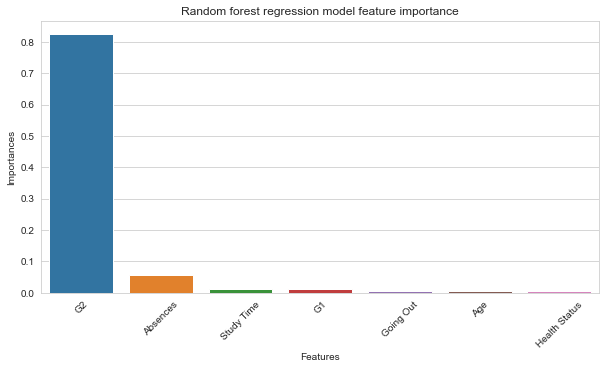

In [89]:
importances = regressor.feature_importances_
final = pd.DataFrame({"Features": x_train.columns, "Importances": importances})
#final.set_index('importances')

final = final.sort_values('Importances', ascending = False)[:7]

plt.figure(figsize = (10, 5))
plt.title("Random forest regression model feature importance")
plt.xticks(rotation = 45)
sns.barplot(x="Features", y = "Importances", data = final)

these are the features that have the most impact on a student final grade.

so based on our random forest model the above features do have an impact on the final grade

we can also see the other factors that dont have much impact on the final grade

## Hyper-parameter Tuning

### BUILD RANDOM FOREST MODEL WITH HYPERPARAMETERS

In [90]:
rf_model = RandomForestRegressor(random_state = 42)

### WITH GRIDSEARCHCV

In [91]:
#from sklearn.model_selection import GridSearchCV
#rf_grid = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv = 5, verbose = 2, n_jobs = 4)

from sklearn.model_selection import GridSearchCV
n_estimators_list = [130,160,190]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [35,55]
# Minimum number of samples required to split a node
min_samples_split = [0.001, 0.005]
# Minimum number of samples required at each leaf node
min_samples_leaf = [0.001, 0.005]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [92]:
param_grid = {'n_estimators': n_estimators_list,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(param_grid)   

{'n_estimators': [130, 160, 190], 'max_features': ['auto', 'sqrt'], 'max_depth': [35, 55], 'min_samples_split': [0.001, 0.005], 'min_samples_leaf': [0.001, 0.005], 'bootstrap': [True, False]}


In [93]:
from sklearn.model_selection import GridSearchCV
rf_grid = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv = 5, verbose = 2, n_jobs = 4,return_train_score = True)


In [94]:
rf_grid.fit(x_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [35, 55],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [0.001, 0.005],
                         'min_samples_split': [0.001, 0.005],
                         'n_estimators': [130, 160, 190]},
             return_train_score=True, verbose=2)

In [95]:
rf_grid.best_params_

{'bootstrap': True,
 'max_depth': 35,
 'max_features': 'auto',
 'min_samples_leaf': 0.005,
 'min_samples_split': 0.001,
 'n_estimators': 130}

In [96]:
rf_grid.best_score_

0.8590935815224631

In [97]:
rf_grid_pred = rf_grid.predict(x_test)

### Evaluating the Model with hyperparameter Tuning

In [98]:
# Evaluating the Algorithm with hyperparameter Tuning
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rf_grid_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rf_grid_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,rf_grid_pred)))

Mean Absolute Error: 0.90543196052277
Mean Squared Error: 2.6952452389567965
Root Mean Squared Error: 1.641720207269435


## Check Accuracy of Tuning

In [99]:
print(f'Train Accuracy - :{rf_grid.score(x_train,y_train):.2f}')
print(f'Test Accuracy - :{rf_grid.score(x_test,y_test):.2f}')


Train Accuracy - :0.93
Test Accuracy - :0.83


# WITH RandomizedSearchCV

In [100]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [101]:
# Create the random grid
#converting the above list to dictionary to be used for the randomised search cv
param_random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(param_random_grid)

{'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [102]:
from sklearn.model_selection import RandomizedSearchCV
rf_randomgrid = RandomizedSearchCV(estimator = rf_model, param_distributions = param_random_grid, cv = 5, verbose = 2, n_jobs = 4, return_train_score = True)

In [103]:
rf_randomgrid.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 31, 52, 73, 94,
                                                         115, 136, 157, 178,
                                                         200]},
                   return_train_score=True, verbose=2)

In [104]:
rf_randomgrid.best_params_

{'n_estimators': 115,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [105]:
rf_randomgrid.best_score_

0.8586481156121529

In [106]:
# Predict on test data
prediction = rf_randomgrid.predict(x_test)# Compute mean squared error
mse = mean_squared_error(y_test, prediction)# Print results
print(mse)
print(mse**.5)

2.746094355915106
1.6571343807655148


In [107]:
# Evaluating the Algorithm with hyperparameter Tuning
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,prediction)))

Mean Absolute Error: 0.9221193205594633
Mean Squared Error: 2.746094355915106
Root Mean Squared Error: 1.6571343807655148


## Check Accuracy of Tuning

In [108]:
print(f'Train Accuracy - :{rf_randomgrid.score(x_train,y_train):.2f}')
print(f'Test Accuracy - :{rf_randomgrid.score(x_test,y_test):.2f}')


Train Accuracy - :0.94
Test Accuracy - :0.82
